In [81]:
import pandas as pd
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [82]:
raw_folder = '../data/raw/'

df_test = pd.read_csv(raw_folder + 'application_test.csv.zip',compression='zip')
df_train = pd.read_csv(raw_folder + 'application_train.csv.zip',compression='zip')

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [84]:
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [85]:
df_train = df_train.dropna()
df_train = df_train.select_dtypes(exclude=['object'])

df_test = df_test.dropna()
df_test = df_test.select_dtypes(exclude=['object'])

In [95]:
processed_folder = '../data/processed/'

df_train.to_csv(processed_folder + 'processed_train.csv')
df_test.to_csv(processed_folder +'processed_test.csv')

In [86]:
df_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [87]:
X_train, y_train = df_train.iloc[:,:-1],df_train.iloc[:,-1]

X_test, y_test = df_test.iloc[:,:-1],df_test.iloc[:,-1]

In [91]:
train_dmatrix = xgb.DMatrix(data=X_train,label=y_train, enable_categorical=True)

test_dmatrix = xgb.DMatrix(data=X_test,label=y_test, enable_categorical=True)

In [89]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [90]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

ValueError: Feature shape mismatch, expected: 105, got 104

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.743156


In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

df_results = xgb.cv(dtrain=test_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
df_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.125911,0.048075,2.128260,0.110680
1,2.053348,0.045448,2.060078,0.110871
2,1.989135,0.044627,2.004373,0.111927
3,1.936603,0.041787,1.956978,0.109903
4,1.890462,0.041221,1.917232,0.109197


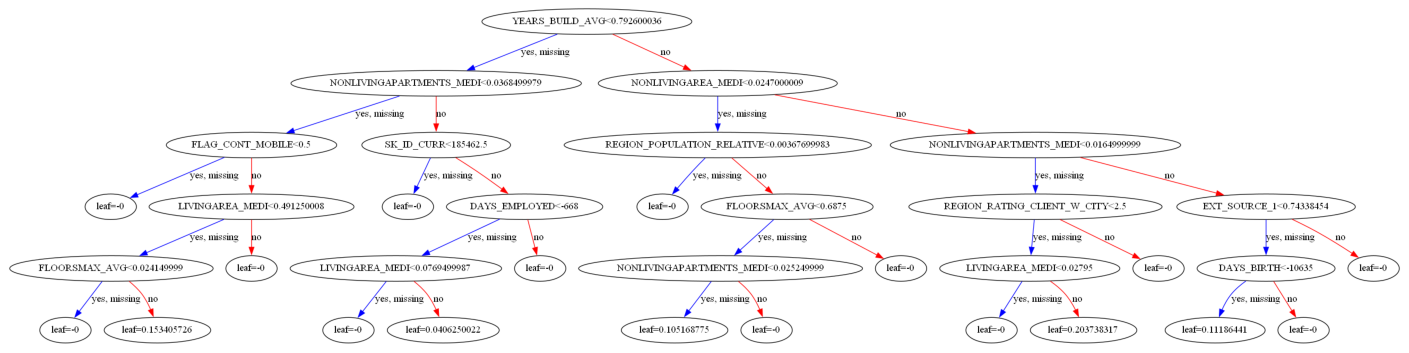

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

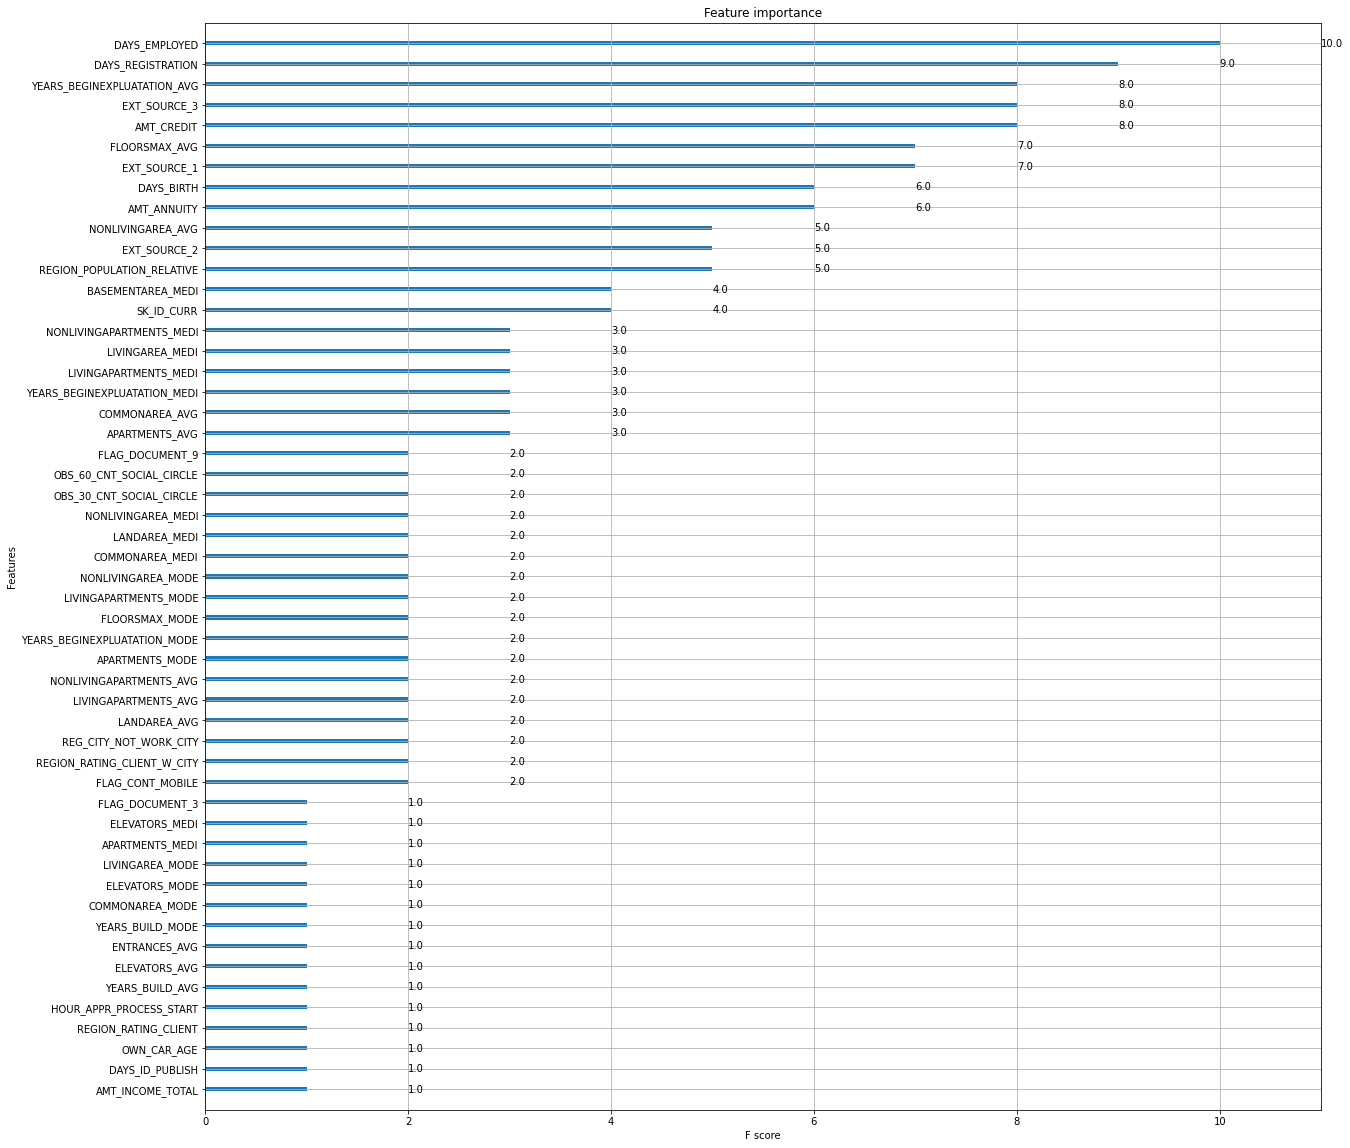

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [25, 25]
plt.show()

In [97]:
model_path = '../models/'
xg_reg.save_model(model_path + "xgboost.json")